The goal of this notebook is to answer both tasks given for the [Credit Card Customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers) - dataset.

The first goal of this project is to provide an analysis which shows the difference between a non-churning and churning customer. This will provide us insight into which customers are eager to churn.

In [1]:
#import necessary library for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#let's import the data!
data = pd.read_csv('BankChurners.csv')
pd.set_option('display.max_columns', None)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Here's some information about the data that we'll do analysis.

**Basic information**
* CLIENTNUM : Unique identifier for the customer holding the account.

**Target/Label**
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0.

**Demographic variables**
* Customer_Age: Demographic variable - Customer's Age in Years.
* Gender: Demographic variable - M=Male, F=Female.
* Dependent_count: Demographic variable - Number of dependents.
* Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.).
* Marital_Status: Demographic variable - Married, Single, Divorced, Unknown.
* Income_Category: Demographic variable - Annual Income Category of the account holder (<  40K, 40K - 60K,  60K− 80K,  80K− 120K, >).

**Product variables**
* Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum).
* Months_on_book: Period of relationship with bank.
* Total_Relationship_Count: Total no. of products held by the customer.
* Months_Inactive_12_mon: No. of Months in the last 12 months.
* Contacts_Count_12_mon: No. of Contacts in the last 12 months.
* Credit_Limit: Credit Limit on the Credit Card.
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card.
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1).
* Total_Trans_Amt: Total Transaction Amount (Last 12 months).
* Total_Trans_Ct: Total Transaction Count (Last 12 months).
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1).
* Avg_Utilization_Ratio: Average Card Utilization Ratio.

**Unimportant variables**
* Naive_Bayes: It was mentioned that all columns containing the "N.B."-tag should be disregarded.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
CLIENTNUM                                                                                                                             10127 non-null int64
Attrition_Flag                                                                                                                        10127 non-null object
Customer_Age                                                                                                                          10127 non-null int64
Gender                                                                                                                                10127 non-null object
Dependent_count                                                                                                                       10127 non-null int64
Education_Level                                                                                                   

In [4]:
# Removing N.B. columns
data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace = True)

In [5]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
data.duplicated().any()

False

In [7]:
data.isnull().any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [8]:
# cleaned data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Exploratory Data Analysis

In [9]:
churned = data[data['Attrition_Flag']=='Existing Customer']
nonchurned = data[data['Attrition_Flag']=='Attrited Customer']

In [10]:
# for comparison barchart
def plot_compare(column,categories) :
    churned_temp = churned[column].value_counts().sort_index()
    nonchurned_temp = nonchurned[column].value_counts().sort_index()
    
    churned_label = churned[column].value_counts().sort_index().index
    nonchurned_label = nonchurned[column].value_counts().sort_index().index
    
    figs, axs = plt.subplots(1,2,figsize=(15,6))
    
    for i in range(0,2) :
        if i == 0 :
            label = churned_label
            height = churned_temp
            colors = 'royalblue'
        else : 
            label = nonchurned_label
            height = nonchurned_temp
            colors = 'darkorange'
        axs[i].bar(label, height, color=colors)
        axs[i].set_ylabel('Total Customers')
        axs[i].set_xlabel(categories)
        axs[i].set_xticks(label)
        axs[i].set_yticks([])
        axs[i].set_xticklabels(height.index.tolist(), rotation=45)
        axs[i].set_facecolor('white')
        axs[i].grid(False)
        
        rects = axs[i].patches
        if i == 0 : labels = churned_temp
        else : labels = nonchurned_temp
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            axs[i].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                    ha='center', va='bottom')
    
    axs[0].set_title('Existing Customer',fontsize=16)
    axs[1].set_title('Attrited Customer',fontsize=16)
    plt.show()

In [11]:
#for plotting pie chart
def plot_pie(column,categories) : 
    figs, axs = plt.subplots()
    target = data[column].value_counts()
    
    axs.pie(target,labels=target.index, autopct='%1.1f%%',shadow = None)
    axs.axis('equal')
    plt.title('Amount of '+categories,fontsize = 16)
    plt.show()

In [12]:
#box plots~
def boxplot(column,categories) :
    figs,axs = plt.subplots()
    sns.set()
    sns.boxplot(x='Attrition_Flag', y=column, data=data,
               hue='Attrition_Flag', ax=axs).set_title(categories + ' vs Churn',fontsize=16)
    axs.yaxis.grid = True

In [13]:
#comparison Histogram
def histogram(column,categories) :
    churned_temp = churned[column]
    nonchurned_temp = nonchurned[column]

    figs, axs = plt.subplots(figsize=(15,6))

    axs.hist([nonchurned_temp,churned_temp],color=['darkorange','royalblue'])
    axs.set_ylabel('Total Customers')
    axs.set_title('Churned '+categories, fontsize=20)
    axs.legend(('Churned Customers', 'Existing Customers'))
    axs.grid(False)
    axs.set_facecolor('white')

#### Amount of Churned Customers

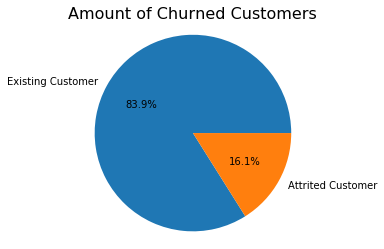

In [14]:
plot_pie('Attrition_Flag','Churned Customers')

The data quite unbalance since most of the customers are existing customer.

#### Demographic Values vs Churn

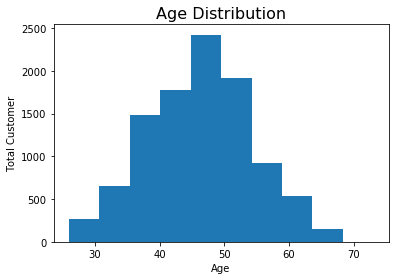

In [15]:
# Customer_Age vs Attrition_Flag
data['Customer_Age'].hist()
plt.xlabel('Age')
plt.ylabel('Total Customer')
plt.title('Age Distribution',fontsize=16)
plt.grid(False)
plt.show()

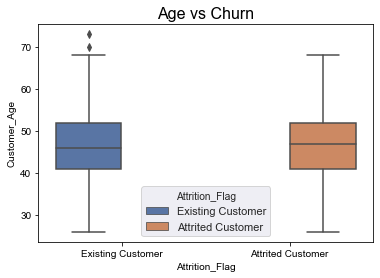

In [16]:
boxplot('Customer_Age','Age')

The customer age doesn't show significant difference in existing and churned customer.

In [17]:
#Gender vs Attrition_Flag
churnedgender = churned['Gender'].value_counts()
nonchurnedgender = nonchurned['Gender'].value_counts()

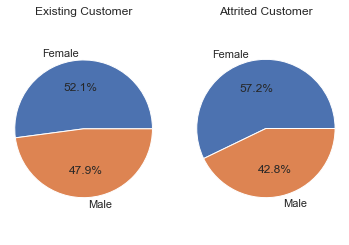

In [18]:
fig3, ax3 = plt.subplots(1,2)

ax3[0].pie(churnedgender,labels=['Female','Male'], autopct='%1.1f%%',shadow = None)
ax3[0].axis('equal')
ax3[0].set_title('Existing Customer')

ax3[1].pie(nonchurnedgender,labels=['Female','Male'], autopct='%1.1f%%',shadow = None)
ax3[1].axis('equal')
ax3[1].set_title('Attrited Customer')

plt.show()

The gender also doesn't show significant difference.

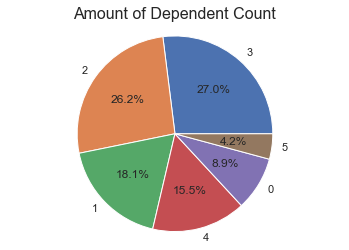

In [19]:
#Dependent_count vs Attrition_Flag
plot_pie('Dependent_count','Dependent Count')

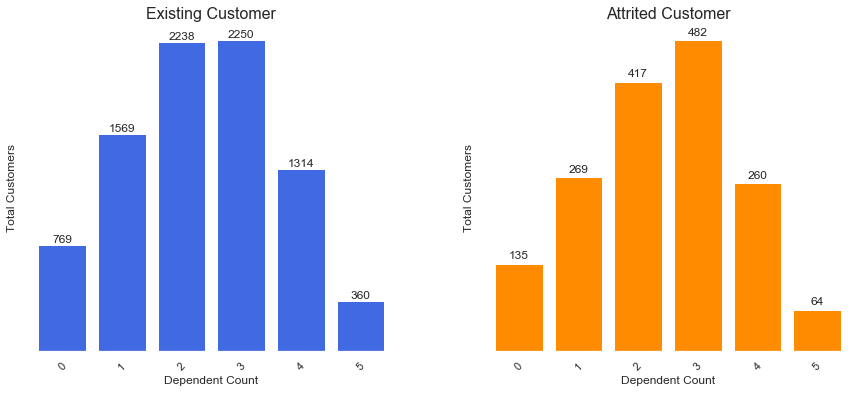

In [20]:
plot_compare('Dependent_count','Dependent Count')

There's no clear shift when we compare the two data, so we can say that dependent count also doesn't do much difference.

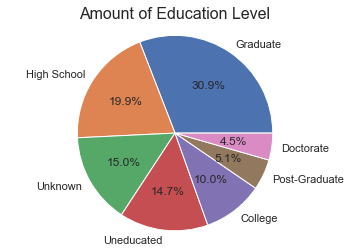

In [21]:
#Education_Level vs Attrition_Flag
plot_pie('Education_Level','Education Level')

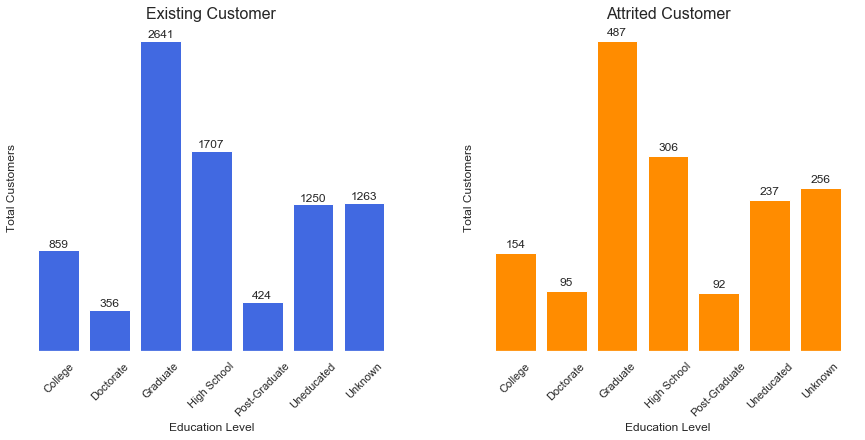

In [22]:
plot_compare('Education_Level','Education Level')

Same with dependent count, education level also doesn't show significant shift.

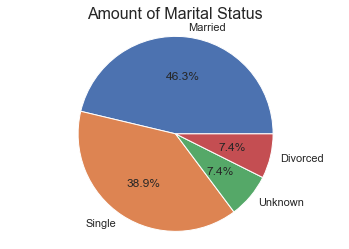

In [23]:
#Marital_Status vs Attrition Flag
plot_pie('Marital_Status','Marital Status')

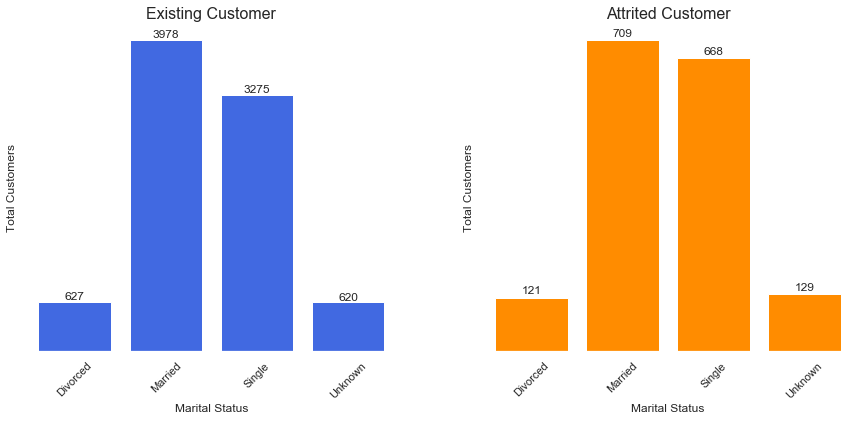

In [24]:
plot_compare('Marital_Status','Marital Status')

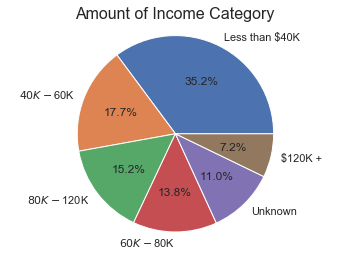

In [25]:
#Income_Category vs Attrition Flag
plot_pie('Income_Category','Income Category')

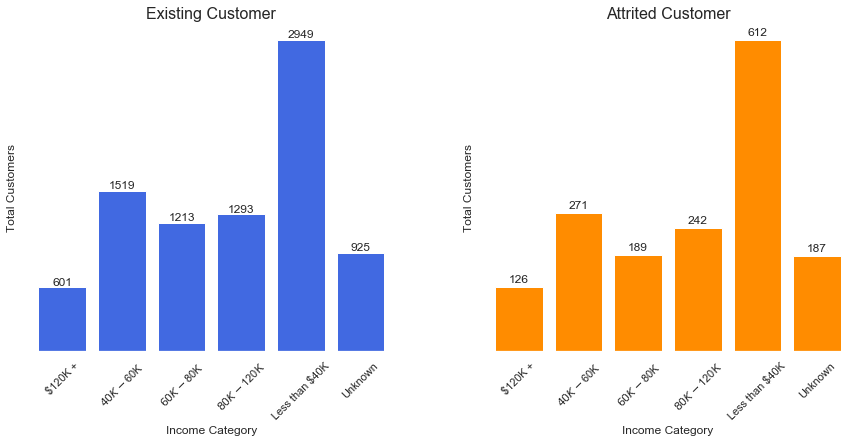

In [26]:
plot_compare('Income_Category','Income Category')

Here's some interesting fact that Income Category doesn't affecting much since there's no significant shifting on the distribution. From here we know there's a lot of customers that have income lestt than $40K.

#### Product Variables vs Churn

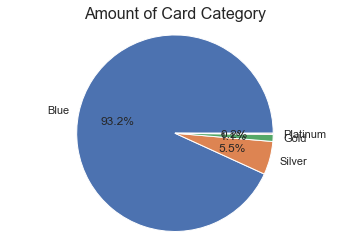

In [27]:
#Card_Category vs Attrition Flag
plot_pie('Card_Category','Card Category')

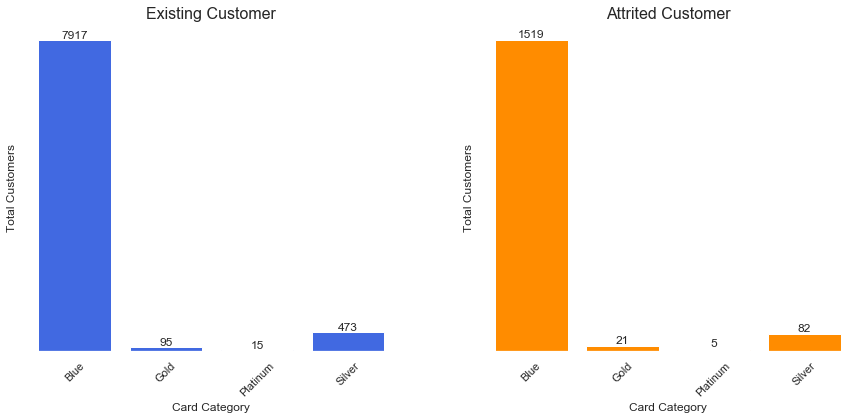

In [28]:
plot_compare('Card_Category','Card Category')

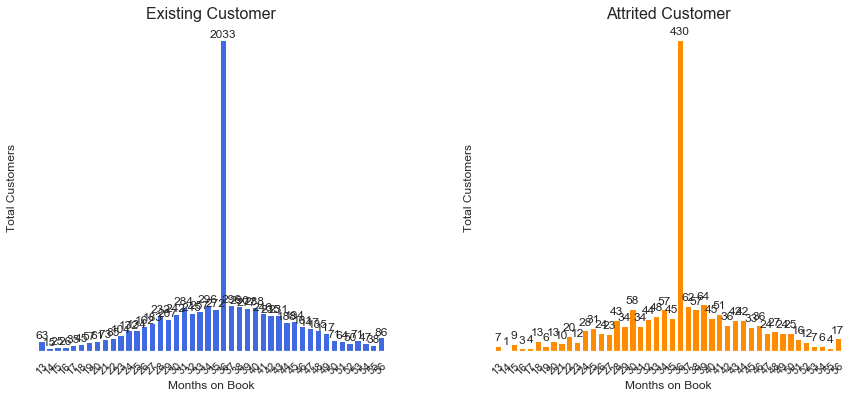

In [29]:
#Month_on_book vs Attrition Flag
plot_compare('Months_on_book','Months on Book')

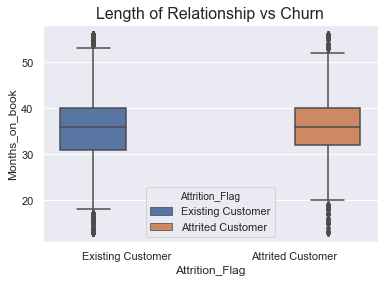

In [30]:
boxplot('Months_on_book','Length of Relationship')

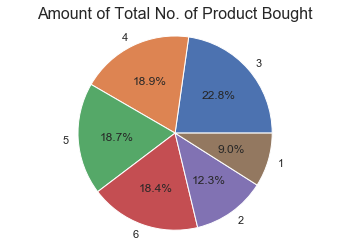

In [31]:
#Total_Relationship_Count vs Attrition_Flag
plot_pie('Total_Relationship_Count','Total No. of Product Bought')

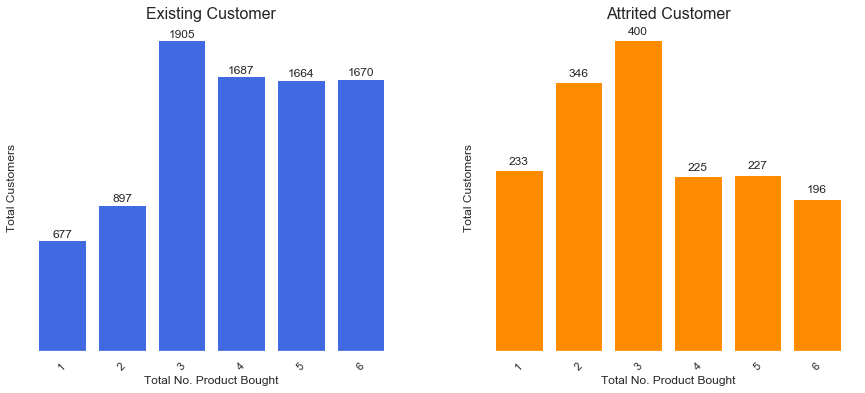

In [55]:
plot_compare('Total_Relationship_Count','Total No. Product Bought')

Here we can clearly see some shifting on the distribution. Existing customers tend to buy more products than attrited customer.

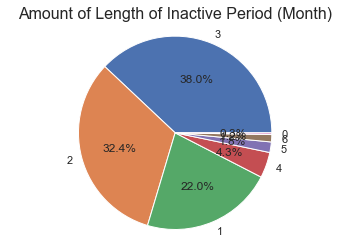

In [33]:
#Months_Inactive_12_mon vs Attrition_Flag
plot_pie('Months_Inactive_12_mon','Length of Inactive Period (Month)')

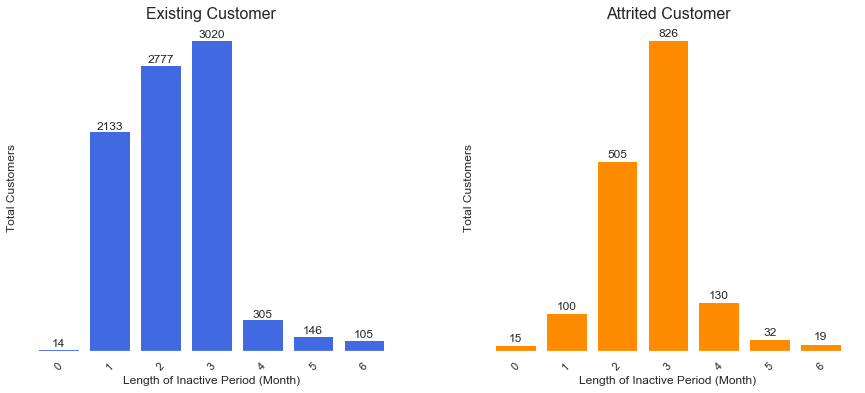

In [34]:
plot_compare('Months_Inactive_12_mon','Length of Inactive Period (Month)')

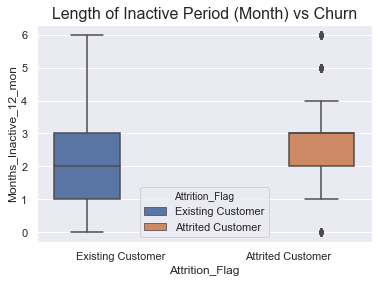

In [35]:
boxplot('Months_Inactive_12_mon','Length of Inactive Period (Month)')

Length of inactive period also show some significant difference where Attrited Customer tend to have longer period of inactive.

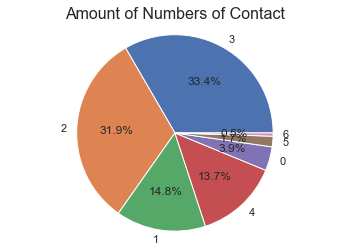

In [36]:
#Contracts_Count_12_mon vs Attrition_Flag
plot_pie('Contacts_Count_12_mon','Numbers of Contact')

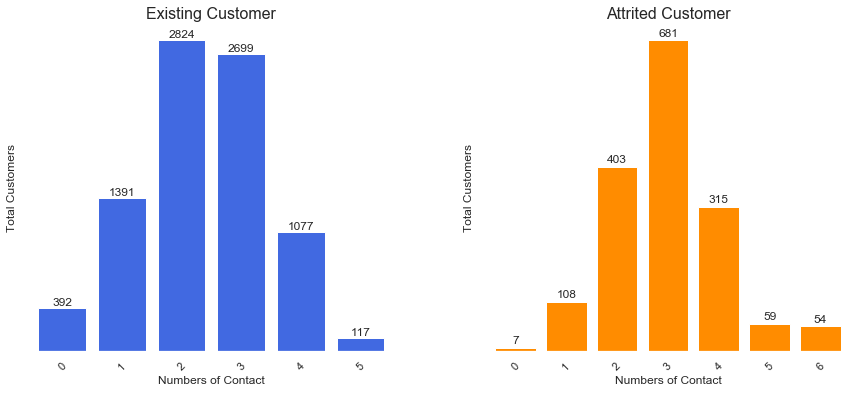

In [37]:
plot_compare('Contacts_Count_12_mon','Numbers of Contact')

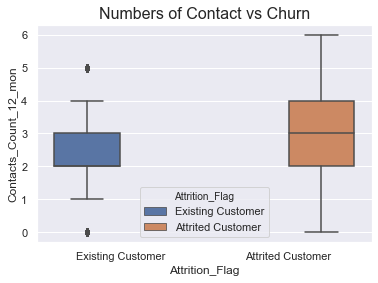

In [38]:
boxplot('Contacts_Count_12_mon','Numbers of Contact')

Although the difference isn't that large but churned customers tend to have more contact then nonchurned customers.

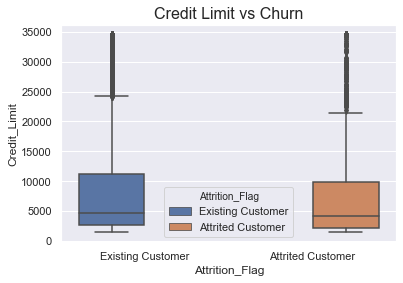

In [39]:
#Credit_Limit vs Attrition_Flag
boxplot('Credit_Limit','Credit Limit')

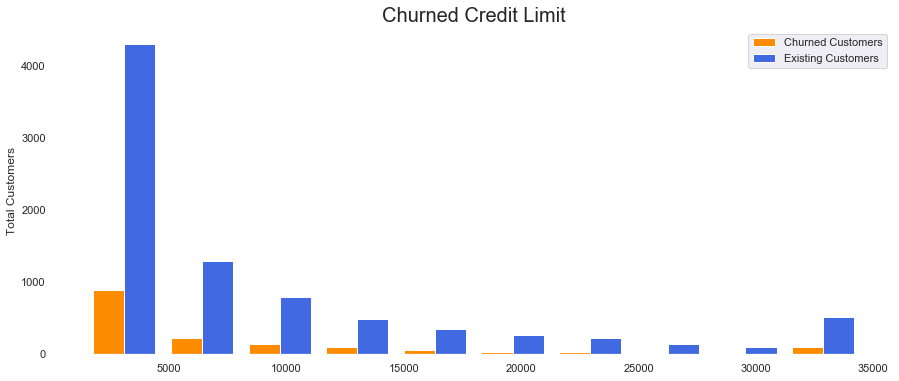

In [40]:
histogram('Credit_Limit','Credit Limit')

There's no much difference on credit limit.

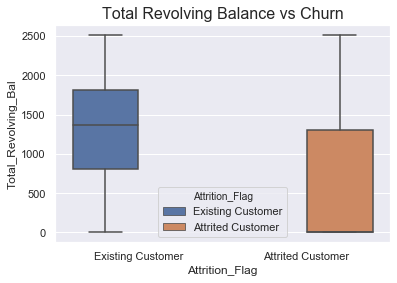

In [41]:
#Total_Revolving_Bal vs Attrition_Flag
boxplot('Total_Revolving_Bal','Total Revolving Balance')

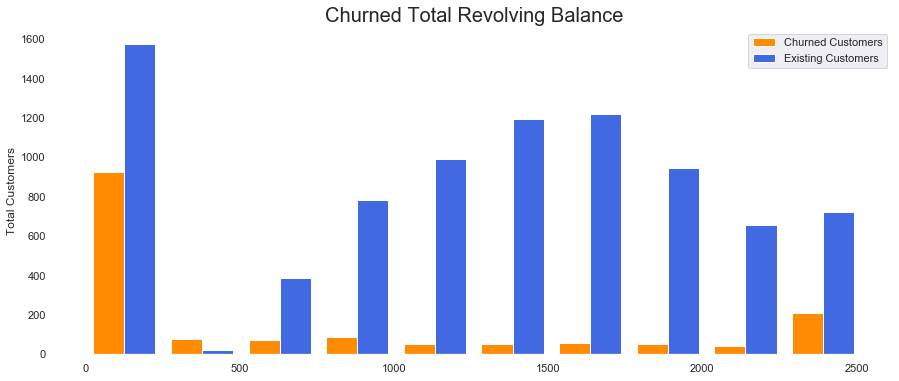

In [42]:
histogram('Total_Revolving_Bal','Total Revolving Balance')

There's clear difference that churned customers have lower revolving balance than existing customers.

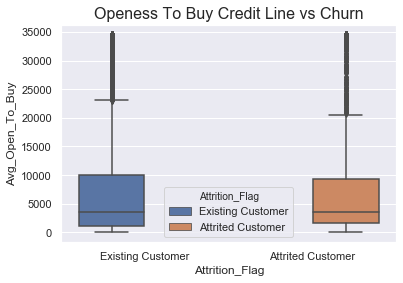

In [43]:
#Avg_Open_To_Buy vs Attrition_Flag
boxplot('Avg_Open_To_Buy','Openess To Buy Credit Line')

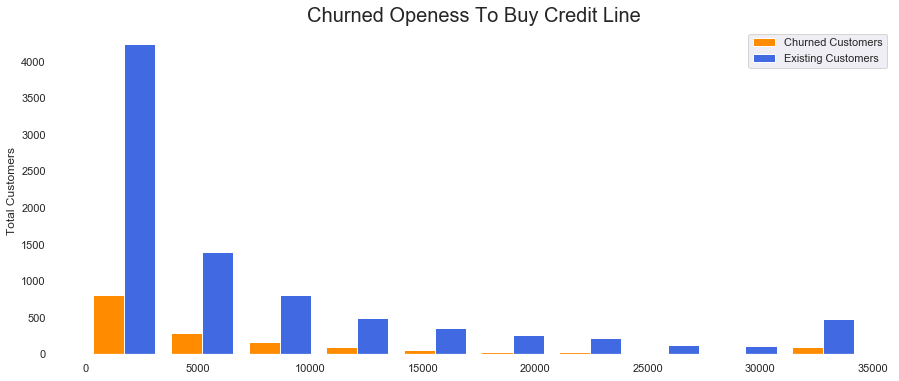

In [44]:
histogram('Avg_Open_To_Buy','Openess To Buy Credit Line')

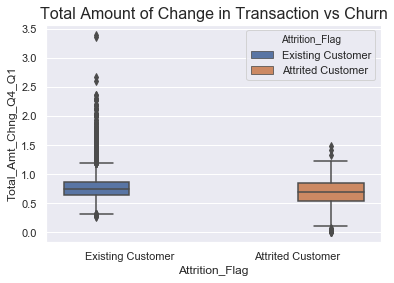

In [45]:
#Total_Amt_Chng_Q4_Q1 vs Attrition_Flag
boxplot('Total_Amt_Chng_Q4_Q1','Total Amount of Change in Transaction')

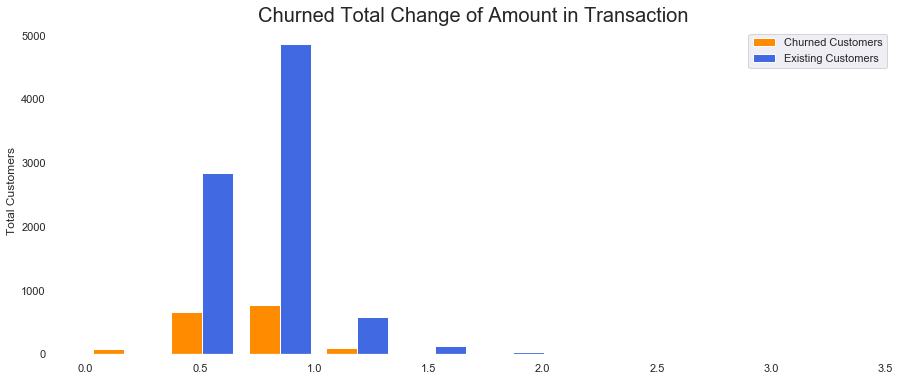

In [46]:
histogram('Total_Amt_Chng_Q4_Q1','Total Change of Amount in Transaction')

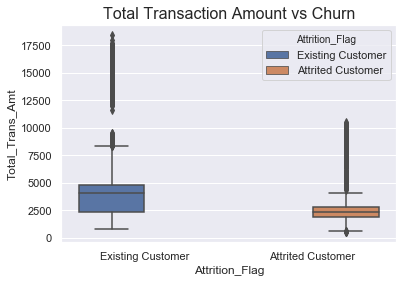

In [47]:
#Total_Trans_Amt vs Attrition_Flag
boxplot('Total_Trans_Amt','Total Transaction Amount')

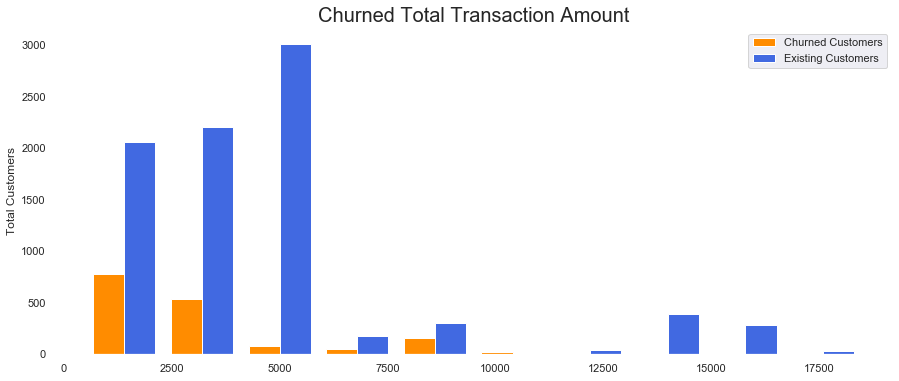

In [48]:
histogram('Total_Trans_Amt','Total Transaction Amount')

The transaction amount of existing customer is clearly higher than churned customers.

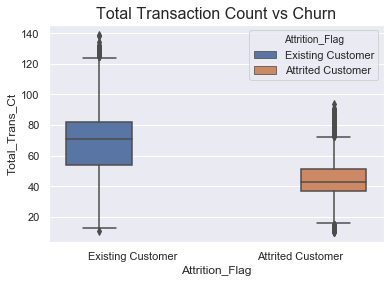

In [49]:
#Total_Trans_Ct vs Attrition_Flag
boxplot('Total_Trans_Ct','Total Transaction Count')

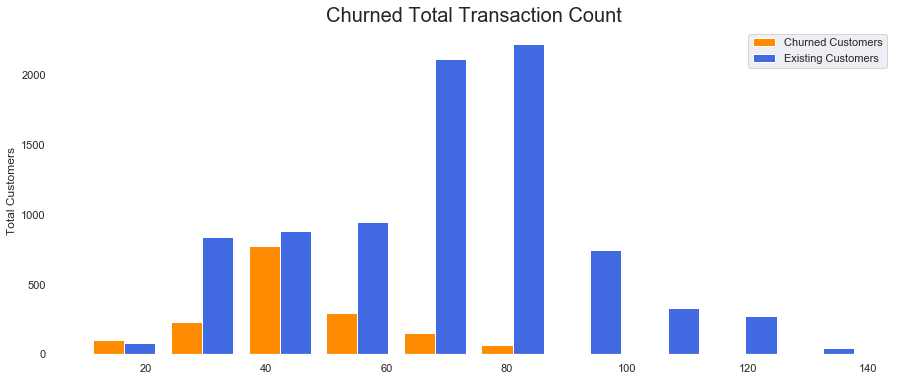

In [50]:
histogram('Total_Trans_Ct','Total Transaction Count')

The transaction count of churned customer is clearly lower than existing customers.

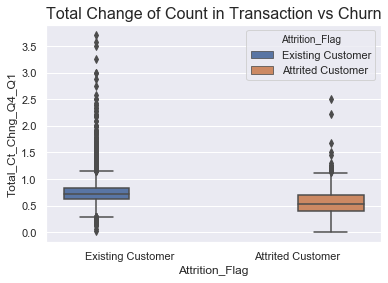

In [51]:
#Total_Ct_Chng_Q4_Q1 vs Attrition_Flag
boxplot('Total_Ct_Chng_Q4_Q1','Total Change of Count in Transaction')

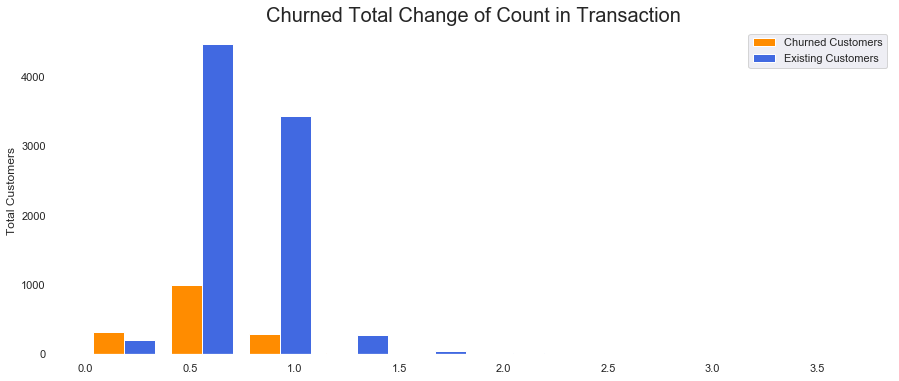

In [52]:
histogram('Total_Ct_Chng_Q4_Q1','Total Change of Count in Transaction')

There's significant difference here since average is higher for existing customers.

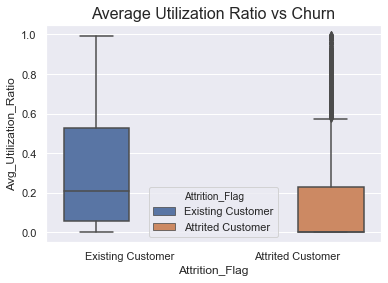

In [53]:
#Avg_Utilization_Ratio vs Attrition_Flag
boxplot('Avg_Utilization_Ratio','Average Utilization Ratio')

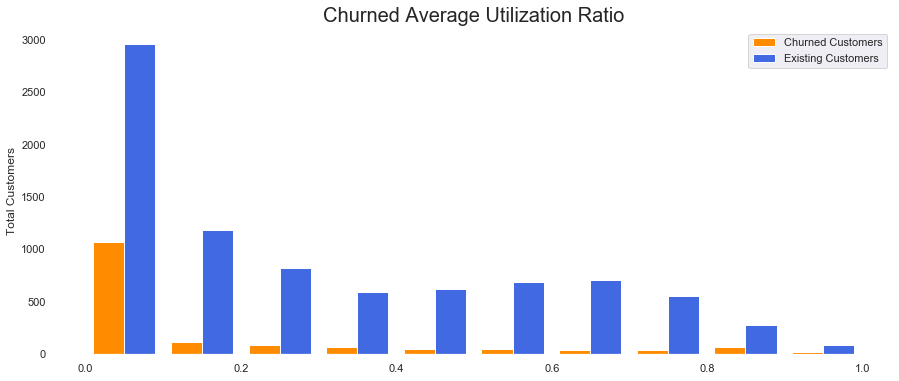

In [54]:
histogram('Avg_Utilization_Ratio','Average Utilization Ratio')

It's clearly shown that existing customers have higher utilization ratio.

#### Conclusion

According to the EDA from above we can conclude that main difference produced from "Product Variables" of the customers. Churning customers tend to be less active than existing customers. The most influental parameters are the features related to customer's activity.